# Metody Inteligencji Obliczeniowej w Analizie Danych

[Tasks](https://pages.mini.pw.edu.pl/~karwowskij/mioad/lab-sieci.html)

### Lab 4: NN3: Implementacja momentu i normalizacji gradientu (1 tydzień, 2 punkty)

Zaimplementować dwa usprawnienia uczenia gradientowego sieci neuronowej:
- moment,
- normalizację gradientu RMSProp.

Porównać szybkość zbieżności procesu uczenia dla obu wariantów.

Przeprowadzić eksperymenty na zbiorach(w nawiasach wartość MSE, aby otrzymać 2 punkty):
- square-large (MSE: 1),
- steps-large (MSE: 3),
- multimodal-large (MSE: 9).

Literatura:
- Uczenie gradientowe z momentem: rozdział 3.2.2 Computational Intelligence, A. P. Engelbrecht

- Normalizacja gradientu: Wykład 6e: http://www.cs.toronto.edu/~tijmen/csc321/slides/lecture_slides_lec6.pdf

#### TODO:

- ~~implement learning with moment~~
- ~~implement RMSProp gradient normalization~~


In [2]:
from MultiLayerPerceptron import NeuralNetwork, Layer
import pandas as pd

### Function for visualization of predicted vs original data

In [3]:
import matplotlib.pyplot as plt
def plot_compare_predicted_real(net, x_train,y_train,x_test,y_test):
    xmin = min(x_train+ x_test)[0] *1.1
    xmax = max(x_train+ x_test)[0] *1.1

    fig1, ax = plt.subplots()

    ax.scatter(x_train, y_train, color="green",label="real y")
    ax.scatter(x_train, net.predict(x_train), color="red",label="predicted y")
    ax.legend()
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    plt.title("real vs predicted y - train data")
    ax.set_xlim(xmin, xmax)
    plt.show()

    fig1, ax = plt.subplots()
    ax.scatter(x_test, y_test, color="green",label="real y")
    ax.scatter(x_test, net.predict(x_test), color="red",label="predicted y")
    ax.legend()
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    plt.title("real vs predicted y - test data")
    plt.show()

## Dataset 1: Square Large

In [4]:
df_train = pd.read_csv('data/regression/square-large-training.csv').set_index("Unnamed: 0")
df_test = pd.read_csv('data/regression/square-large-test.csv').set_index("Unnamed: 0")
print(df_test.head())

x_train = [[x] for x in df_train.loc[:,"x"]]
y_train = [[y] for y in df_train.loc[:,"y"]]
x_test = [[x] for x in df_test.loc[:,"x"]]
y_test = [[y] for y in df_test.loc[:,"y"]]

                   x           y
Unnamed: 0                      
1           1.366456   38.048149
2          -0.390025 -116.309280
3           1.090418  -22.988883
4           1.805831  163.492435
5          -0.938124  -50.793090


#### Model 1

In [46]:
net1 = NeuralNetwork(weights_randomizer="uniform")
net1.add(Layer(neurons_count=1, add_bias=True))
net1.add(Layer(neurons_count=80, activation_fun="sigmoid", add_bias=True))
net1.add(Layer(neurons_count=1, activation_fun="linear", add_bias=False))

In [47]:
net1.train(x_train, y_train,x_test,y_test, epochs=100, learning_rate=0.0001, batch_size=16, \
            with_moment=True, moment_decay=0.994)


Epoch:    1/100,   MSE train:11635.722,   MSE test:12291.856
Epoch:   11/100,   MSE train:   31.158,   MSE test:   67.035
Epoch:   21/100,   MSE train:    2.934,   MSE test:   48.185
Epoch:   31/100,   MSE train:     0.29,   MSE test:   26.357
Epoch:   41/100,   MSE train:    0.176,   MSE test:   23.594
Epoch:   51/100,   MSE train:    0.134,   MSE test:   21.349
Epoch:   61/100,   MSE train:    0.105,   MSE test:    19.71
Epoch:   71/100,   MSE train:    0.088,   MSE test:   18.599
Epoch:   81/100,   MSE train:    0.077,   MSE test:   17.849
Epoch:   91/100,   MSE train:    0.069,   MSE test:    17.34
Epoch:  100/100,   MSE train:    0.064,   MSE test:   17.025


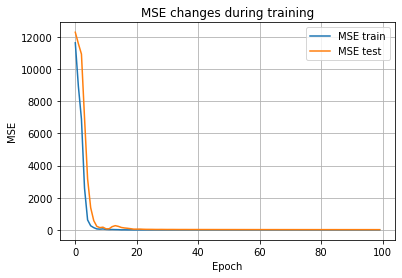

In [48]:
net1.plot_training_history()

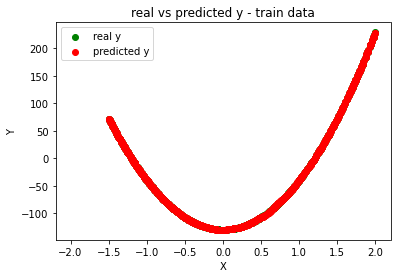

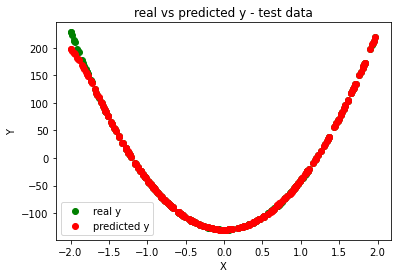

In [49]:
plot_compare_predicted_real(net1, x_train,y_train,x_test,y_test)

#### Model 2

In [86]:
net1 = NeuralNetwork()
net1.add(Layer(neurons_count=1, add_bias=True))
net1.add(Layer(neurons_count=80, activation_fun="sigmoid", add_bias=True))
net1.add(Layer(neurons_count=1, activation_fun="linear", add_bias=False))

In [87]:
net1.train(x_train, y_train,x_test,y_test, epochs=100, learning_rate=0.01, batch_size=32, \
            with_rms_prop=True, rms_prop_decay=0.9999)

Epoch:    1/100,   MSE train:11699.125,   MSE test:12056.284
Epoch:   11/100,   MSE train:   91.121,   MSE test: 1823.595
Epoch:   21/100,   MSE train:   27.826,   MSE test: 1283.363
Epoch:   31/100,   MSE train:   15.538,   MSE test: 1093.105
Epoch:   41/100,   MSE train:      9.9,   MSE test:  997.016
Epoch:   51/100,   MSE train:     6.54,   MSE test:  924.834
Epoch:   61/100,   MSE train:    4.633,   MSE test:  868.239
Epoch:   71/100,   MSE train:    3.501,   MSE test:  824.863
Epoch:   81/100,   MSE train:    2.781,   MSE test:  791.318
Epoch:   91/100,   MSE train:    2.298,   MSE test:  764.653
Epoch:  100/100,   MSE train:    1.986,   MSE test:  744.849


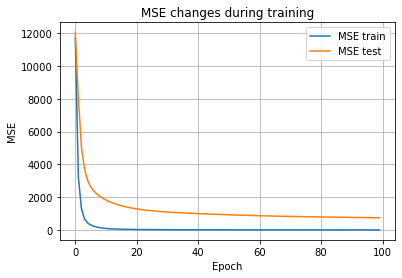

In [88]:
net1.plot_training_history()

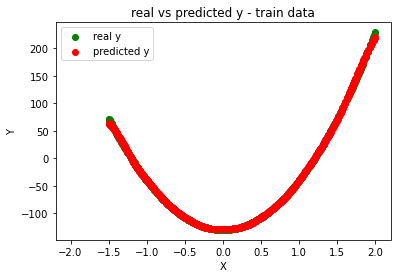

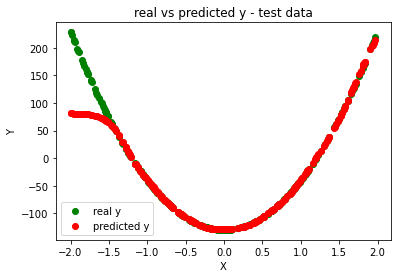

In [89]:
plot_compare_predicted_real(net1, x_train,y_train,x_test,y_test)

## Dataset 2: Steps Large

In [90]:
df_train = pd.read_csv('data/regression/steps-large-training.csv').set_index("Unnamed: 0")
df_test = pd.read_csv('data/regression/steps-large-test.csv').set_index("Unnamed: 0")
print(df_test.head())

x_train = [[x] for x in df_train.loc[:,"x"]]
y_train = [[y] for y in df_train.loc[:,"y"]]
x_test = [[x] for x in df_test.loc[:,"x"]]
y_test = [[y] for y in df_test.loc[:,"y"]]

                   x    y
Unnamed: 0               
1           1.706990  160
2          -0.604580  -80
3          -0.674405  -80
4           1.341562   80
5          -1.427434  -80


#### Model 1

In [128]:
net2 = NeuralNetwork()
net2.add(Layer(neurons_count=1, add_bias=True))
net2.add(Layer(neurons_count=5, activation_fun='sigmoid', add_bias=True))
net2.add(Layer(neurons_count=5, activation_fun='sigmoid', add_bias=True))
net2.add(Layer(neurons_count=1, activation_fun='linear', add_bias=False))

In [129]:
net2.train(x_train, y_train,x_test,y_test, epochs=100, learning_rate=0.0001, batch_size=8, \
            with_moment=True, moment_decay=0.9)

Epoch:    1/100,   MSE train: 7213.721,   MSE test: 7284.877
Epoch:   11/100,   MSE train:  153.206,   MSE test:  180.436
Epoch:   21/100,   MSE train:   56.672,   MSE test:   64.619
Epoch:   31/100,   MSE train:   62.176,   MSE test:   77.649
Epoch:   41/100,   MSE train:   31.056,   MSE test:   29.638
Epoch:   51/100,   MSE train:   26.903,   MSE test:   23.544
Epoch:   61/100,   MSE train:   25.189,   MSE test:   21.939
Epoch:   71/100,   MSE train:   23.881,   MSE test:    20.08
Epoch:   81/100,   MSE train:   21.976,   MSE test:    17.82
Epoch:   91/100,   MSE train:   20.778,   MSE test:   16.591
Epoch:  100/100,   MSE train:   19.921,   MSE test:   15.744


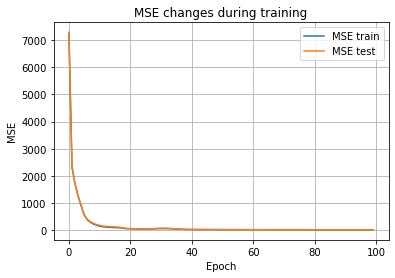

In [130]:
net2.plot_training_history()

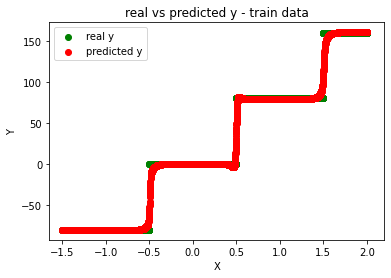

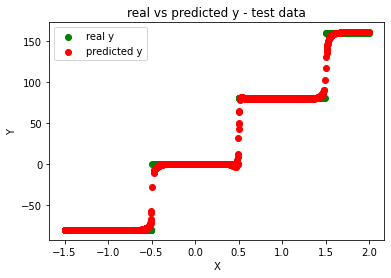

In [131]:
plot_compare_predicted_real(net2, x_train,y_train,x_test,y_test)

## Dataset 3: Multimodal Large

In [132]:
df_train = pd.read_csv('data/regression/multimodal-large-test.csv')
df_test = pd.read_csv('data/regression/multimodal-large-training.csv')
print(df_train.head())

x_train = [[x] for x in df_train.loc[:,"x"]]
y_train = [[y] for y in df_train.loc[:,"y"]]
x_test = [[x] for x in df_test.loc[:,"x"]]
y_test = [[y] for y in df_test.loc[:,"y"]]

          x           y
0  0.493292  -98.208166
1 -0.470203  -55.283891
2  1.869983  100.299997
3 -1.040446    2.720629
4 -0.616507  -75.991636


### Model 1

In [231]:
net3 = NeuralNetwork()
net3.add(Layer(neurons_count=1, add_bias=True))
net3.add(Layer(neurons_count=100, activation_fun='sigmoid', add_bias=True))
net3.add(Layer(neurons_count=1, activation_fun='linear', add_bias=False))

In [232]:
net3.train(x_train, y_train,x_test,y_test, epochs=30, learning_rate=0.001, batch_size=1, \
            with_moment=True, moment_decay=0.3)

Epoch:    1/30,   MSE train: 5222.802,   MSE test: 5190.025
Epoch:    4/30,   MSE train: 2152.814,   MSE test: 2117.889
Epoch:    7/30,   MSE train: 1399.897,   MSE test:  1342.81
Epoch:   10/30,   MSE train: 1159.158,   MSE test:  1094.02
Epoch:   13/30,   MSE train: 1000.186,   MSE test:  934.829
Epoch:   16/30,   MSE train:  804.547,   MSE test:  747.458
Epoch:   19/30,   MSE train:  653.826,   MSE test:  606.478
Epoch:   22/30,   MSE train:  517.784,   MSE test:  479.747
Epoch:   25/30,   MSE train:   404.72,   MSE test:  375.232
Epoch:   28/30,   MSE train:  326.925,   MSE test:  304.867
Epoch:   30/30,   MSE train:  291.155,   MSE test:  273.301


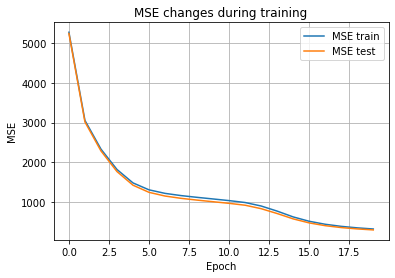

In [229]:
net3.plot_training_history()

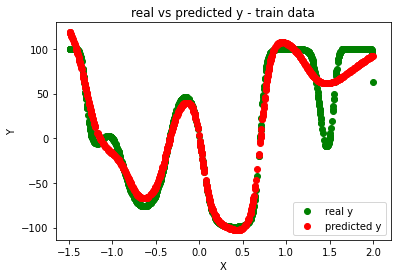

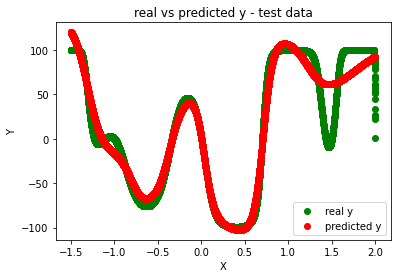

In [230]:
plot_compare_predicted_real(net3, x_train,y_train,x_test,y_test)